In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [1]:
path='D:/Data/aclImdb/train/neg'
os.chdir(path)
neg_cmnt=[]
os.chdir(path)
def read_txt_file(file_path):
    with open(file_path,encoding="utf8") as file:
        lines=[]
        for line in file:
            lines.append(line)
    neg_cmnt.extend(lines)
for file in os.listdir():
    if file.endswith(".txt"):
        file_path=f"{path}\{file}"
        read_txt_file(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
pos_cmnt=[]
def read_txt_file(file_path):
    with open(file_path,encoding="utf8") as file:
        lines=[]
        for line in file:
            lines.append(line)
    pos_cmnt.extend(lines)
for file in os.listdir():
    if file.endswith(".txt"):
        file_path=f"{path}\{file}"
        read_txt_file(file_path)

In [5]:
#len(pos_cmnt)
len(pos_cmnt)

12500

In [6]:
cmnt=[]
for line in pos_cmnt:
    if len(line)>0 and len(cmnt)<50:
        cmnt.append(line)
for line in neg_cmnt:
    if len(line)>0 and len(cmnt)<100:
        cmnt.append(line)

In [101]:
res=[1]*50+[0]*50
df=pd.DataFrame({'X':cmnt,'Y':res})


In [102]:
df=df.sample(frac=1)

In [107]:
df

,X,Y
98,i would have liked to write about the story bu...,0
20,the characters are unlikeable and the script i...,1
75,summer season is here when the choices in the ...,0
56,the second attempt by a new york intellectual ...,0
81,i had a lot of expectations from this movie an...,0
...,...,...
29,i had some expectation for the movie since it ...,1
67,ghost of dragstrip hollow is a typical 1950 s ...,0
11,the plot for descent if it actually can be cal...,1
54,when i was little my parents took me along to ...,0


In [108]:
import re
def modify(df):
    pattern=re.compile('[\W_]+')
    df.X=pattern.sub(' ',df.X).lower()
    df.X=re.sub("\d+",' ',df.X)
    return df
df=df.apply(modify,axis='columns')
df

,X,Y
98,i would have liked to write about the story bu...,0
20,the characters are unlikeable and the script i...,1
75,summer season is here when the choices in the ...,0
56,the second attempt by a new york intellectual ...,0
81,i had a lot of expectations from this movie an...,0
...,...,...
29,i had some expectation for the movie since it ...,1
67,ghost of dragstrip hollow is a typical s tee...,0
11,the plot for descent if it actually can be cal...,1
54,when i was little my parents took me along to ...,0


In [109]:
import nltk
from nltk.corpus import stopwords

In [110]:
words=stopwords.words('english')

In [111]:
def remove_sw(df):
    sen=df.X.split(' ')
    res=[]
    for word in sen:
        if word not in words:
            res.append(word)
    df.X=" ".join(res)
    return df

In [112]:
df=df.apply(remove_sw,axis='columns')
df

,X,Y
98,would liked write story would liked quote coup...,0
20,characters unlikeable script awful waste talen...,1
75,summer season choices cinemas limited hottest ...,0
56,second attempt new york intellectual less ye...,0
81,lot expectations movie since yashraj film br b...,0
...,...,...
29,expectation movie since nice star cast return ...,1
67,ghost dragstrip hollow typical teens turmoil...,0
11,plot descent actually called plot two notewort...,1
54,little parents took along theater see interior...,0


In [113]:
from nltk.stem.porter import PorterStemmer
stem=PorterStemmer()
def stemmings(df):
    words=df.X.split(' ')
    res=[]
    for word in words:
        res.append(stem.stem(word))
    df.X=" ".join(res)
    return df
df=df.apply(stemmings,axis='columns')
df


,X,Y
98,would like write stori would like quot coupl h...,0
20,charact unlik script aw wast talent deneuv aut...,1
75,summer season choic cinema limit hottest movi ...,0
56,second attempt new york intellectu less year...,0
81,lot expect movi sinc yashraj film br br jimmi ...,0
...,...,...
29,expect movi sinc nice star cast return duo aks...,1
67,ghost dragstrip hollow typic teen turmoil mo...,0
11,plot descent actual call plot two noteworthi e...,1
54,littl parent took along theater see interior o...,0


In [114]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [128]:
vocab_dim=5000
max_len=200
oov_tok='<OOV>'
trunc_type='post'
padding_type='post'
training_size=80
embedding_dim=10


In [129]:
sentences,labels=list(df.X.values),list(df.Y.values)
training_sen=sentences[:training_size]
training_labels=labels[:training_size]
testing_sen=sentences[training_size:]
testing_labels=labels[training_size:]
print(len(training_sen),len(testing_sen))

80 20


In [130]:
tokenizer=Tokenizer(num_words=vocab_dim,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sen)
training_seq=tokenizer.texts_to_sequences(training_sen)
training_pad=pad_sequences(training_seq,padding=padding_type,truncating=trunc_type,maxlen=max_len)
training_pad[0]


array([ 21,   5, 464,  17,  21,   5, 779, 657, 310, 272, 160,   3, 311,
       161,   5, 174, 658,  21,   5, 780, 312, 465, 162, 466, 229, 781,
       782,  72, 109,   3,  21,   5, 200, 467, 659,  10,   5, 398,  25,
         2,   2, 468,   2,   2,   3, 783,  32, 110, 784, 399, 785, 467,
       786, 787,   3,  44, 400, 788, 789, 790, 313, 791, 792, 793, 794,
        32, 469, 314,  44, 795, 796, 797,  59, 470, 798,  39, 799, 130,
       401,   3, 800, 175,   3, 176,  59, 471,  80,  11, 801, 315, 802,
       472, 803, 201, 473,  40,  21, 804, 316, 317, 805, 806,   3, 474,
       807,  19,   3, 475, 808, 177, 660,   6, 144,   6, 145,   2,   2,
        40,  31,  73,  35,   3,  17, 809, 146, 230, 131, 810,  17, 318,
        45,  19, 811,   6, 319, 476, 477,  14,   6, 476,  31,  82,  35,
       163,  28,  12, 812, 813, 402, 478, 814, 479,  11,  72, 109,   3,
       815, 319, 816,   2,   2,  40,   5,   3,  16,  12, 480, 164,  47,
       817, 320, 818, 231, 819, 481, 132, 232, 820, 321, 321, 32

In [131]:
testing_seq=tokenizer.texts_to_sequences(testing_sen)
testing_pad=pad_sequences(testing_seq,maxlen=max_len,padding='post',truncating='post')
testing_pad[0]

array([  55,    3,  252,  384,   77,   78, 1362,    1,   13,   24,   46,
          1,   11,    3,   82,   69,  406,   17,   92,    1,    1,   92,
         92,  454,    7,   21,   45,   92,  706,    2,    2,  438,  331,
         98,  234,  384,  184,  384,   44,   46,   54,    9,    1,    1,
        392,    1,    3,   10,  448,  280,  213,    1,   11,    1,  428,
          5,   13,    1,    1,   14,  242, 1301,  624,    1,  242,   38,
        249,   29,   10,  448,    2,    2,   40,    3,  290,  229,   17,
        215,    1,    3,    2,    2,   46,   40,    3,  254,  770,   16,
         37,   34,  142,    6,   65,  395,    2,    2,  313,  376,  376,
         38,    6,   18,  723,  241,    3,   46,   11,  213,  153,  428,
          9,    2,    2,  204,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [148]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Embedding,Bidirectional
training_pad = np.array(training_pad)
training_labels = np.array(training_labels)
testing_pad = np.array(testing_pad)
testing_labels = np.array(testing_labels)

In [155]:
model=Sequential()
model.add(Embedding(vocab_dim,embedding_dim,input_length=max_len))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(training_pad,training_labels,epochs=50,batch_size=1,validation_data=(testing_pad,testing_labels))


Epoch 1/50
80/80 [==============================] - 15s 100ms/step - loss: 0.6955 - accuracy: 0.5155 - val_loss: 0.7070 - val_accuracy: 0.3500
Epoch 2/50
80/80 [==============================] - 6s 76ms/step - loss: 0.6911 - accuracy: 0.5419 - val_loss: 0.7045 - val_accuracy: 0.3500
Epoch 3/50
80/80 [==============================] - 6s 71ms/step - loss: 0.6881 - accuracy: 0.5866 - val_loss: 0.7066 - val_accuracy: 0.3500
Epoch 4/50
80/80 [==============================] - 6s 71ms/step - loss: 0.6880 - accuracy: 0.5882 - val_loss: 0.7107 - val_accuracy: 0.3500
Epoch 5/50
80/80 [==============================] - 6s 77ms/step - loss: 0.6869 - accuracy: 0.5987 - val_loss: 0.7158 - val_accuracy: 0.3500
Epoch 6/50
80/80 [==============================] - 6s 78ms/step - loss: 0.6938 - accuracy: 0.5158 - val_loss: 0.7128 - val_accuracy: 0.3500
Epoch 7/50
80/80 [==============================] - 8s 94ms/step - loss: 0.6927 - accuracy: 0.5244 - val_loss: 0.7185 - val_accuracy: 0.3500
Epoch 8/50


In [152]:
history.history

{'loss': [0.6939372420310974,
  0.69322669506073,
  0.692685067653656,
  0.6925801038742065,
  0.6925187706947327,
  0.6924036741256714,
  0.6921012997627258,
  0.6919680833816528,
  0.6918908357620239,
  0.6923717260360718],
 'accuracy': [0.4749999940395355,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579,
  0.5375000238418579],
 'val_loss': [0.6947249174118042,
  0.695279598236084,
  0.6958492994308472,
  0.6963608860969543,
  0.6979266405105591,
  0.698723554611206,
  0.6988028287887573,
  0.6995342969894409,
  0.701004147529602,
  0.702580988407135],
 'val_accuracy': [0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355,
  0.3499999940395355]}

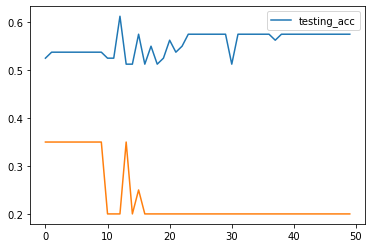

In [157]:
plt.plot(history.history['accuracy'])
plt.legend(['traning_acc'])
plt.plot(history.history['val_accuracy'])
plt.legend(['testing_acc'])

In [163]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score,accuracy_score
yhat=model.predict(testing_pad)
yhat=[1 if num>.5 else 0 for num in yhat]
print(confusion_matrix(testing_labels,yhat))
print(classification_report(testing_labels,yhat))
print(f1_score(testing_labels,yhat))
print(accuracy_score(testing_labels,yhat))


[[4 9]
 [7 0]]
              precision    recall  f1-score   support

           0       0.36      0.31      0.33        13
           1       0.00      0.00      0.00         7

    accuracy                           0.20        20
   macro avg       0.18      0.15      0.17        20
weighted avg       0.24      0.20      0.22        20

0.0
0.2


In [164]:
testing_labels

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)